## Example 1: Simple Harmonic Oscillator

Solve the system with $H=\frac{1}{2}p^2 + \frac{1}{2}q^2$

In [203]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math

In [204]:
def XH_SHO(t, xi):
    # t is ignored; xi = [q, p]
    return np.array([xi[1], -xi[0]])

Energy is not conserved with explicit Euler.

In [205]:
def explicit_euler(dt, xi, xidot):
    return xi + dt*xidot

def solve_explicit_euler(xidotfunc, t, xi0, dt):
    ixi = np.array(xi0)
    nslots = int((t[1]-t[0]) // dt) + 1
    rv = np.zeros(ixi.shape + (nslots,))
    rv[:,0] = ixi
    for islot in range(nslots - 1):
        ixi = explicit_euler(dt, ixi, XH_SHO(t[0]+dt*islot, ixi))
        rv[:,islot+1] = ixi
    return rv

In [208]:
soln=solve_explicit_euler(XH_SHO, [0,40], [1.,0], 0.01)

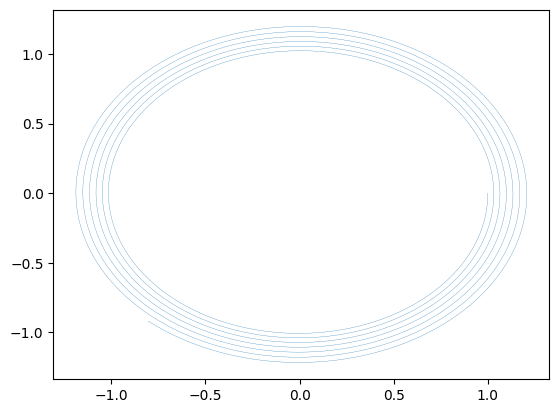

In [209]:
plt.plot(soln[0], soln[1], linewidth=0.2)
plt.show()

This is still a problem with more sophisticated integrators.

In [215]:
soln_rk=scipy.integrate.solve_ivp(XH_SHO, [0, 1200], [1,0], 'RK45')

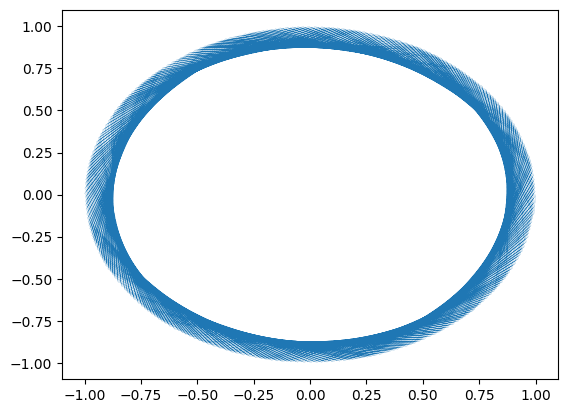

In [216]:
plt.plot(soln_rk.y[0], soln_rk.y[1], linewidth=0.1)
plt.show()

The energy shows a secular change.

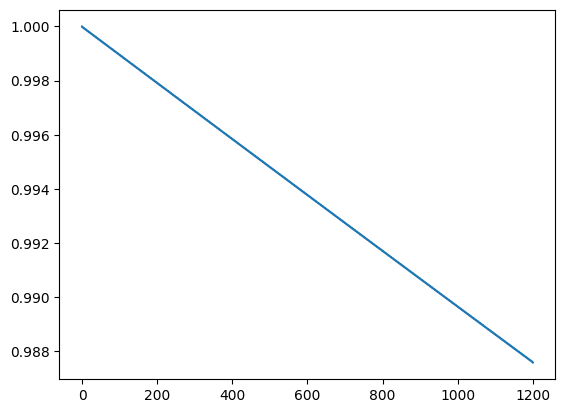

In [217]:
plt.plot(soln_rk.t, np.sqrt(soln_rk.y[0]**2+soln_rk.y[1]**2))
plt.show()

If we use symplectic Euler things look much better:

In [218]:
def solve_symplectic_euler(xidotfunc, t, xi0, dt):
    ixi = np.array(xi0)
    nslots = int((t[1]-t[0]) // dt) + 1
    rv = np.zeros(ixi.shape + (nslots,))
    rv[:,0] = ixi
    NDIM = int(ixi.shape[0]/2)
    for islot in range(nslots - 1):
        ixi[NDIM:] += XH_SHO(t[0]+dt*islot, ixi)[NDIM:]*dt
        ixi[:NDIM] += XH_SHO(t[0]+dt*(islot+1), ixi)[:NDIM]*dt
        rv[:,islot+1] = ixi
    return rv

In [226]:
DT = 0.01
soln=solve_symplectic_euler(XH_SHO, [0,40], [1.,0], DT)

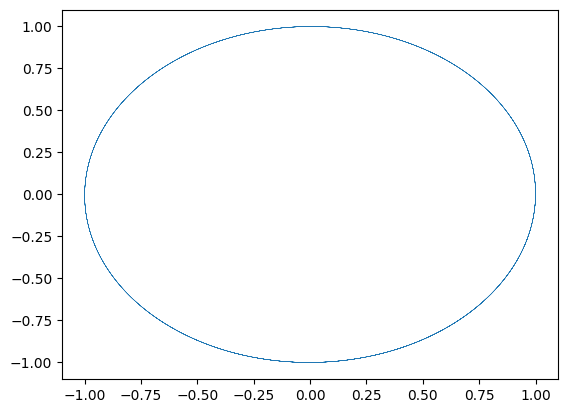

In [227]:
plt.plot(soln[0], soln[1], linewidth=0.2)
plt.show()

Energy plot:

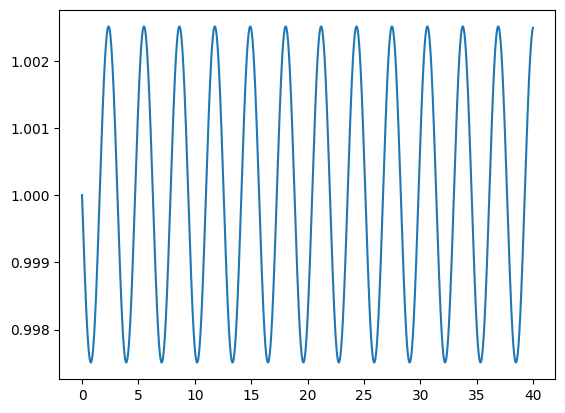

In [228]:
plt.plot(np.array(range(len(soln[0])))*DT, np.sqrt(soln[0]**2+soln[1]**2))
plt.show()

We can get a more accurate result with Verlet:

In [229]:
def solve_verlet(xidotfunc, t, xi0, dt):
    ixi = np.array(xi0)
    nslots = int((t[1]-t[0]) // dt) + 1
    rv = np.zeros(ixi.shape + (nslots,))
    rv[:,0] = ixi
    NDIM = int(ixi.shape[0]/2)
    for islot in range(nslots - 1):
        # note the time assignments are wrong but since H is time-invariant that's OK
        ixi[NDIM:] += xidotfunc(t[0]+dt*islot, ixi)[NDIM:]*dt/2
        ixi[:NDIM] += xidotfunc(t[0]+dt*(islot+1), ixi)[:NDIM]*dt
        ixi[NDIM:] += xidotfunc(t[0]+dt*(islot+1), ixi)[NDIM:]*dt/2
        rv[:,islot+1] = ixi
    return rv

In [230]:
DT = 0.1
soln=solve_verlet(XH_SHO, [0,40], [1.,0], DT)

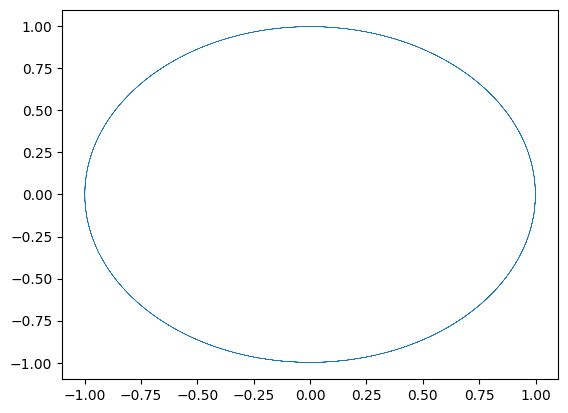

In [231]:
plt.plot(soln[0], soln[1], linewidth=0.2)
plt.show()

Energy plot:

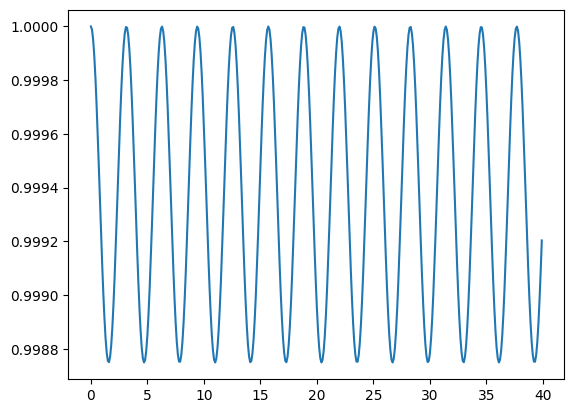

In [232]:
plt.plot(np.array(range(len(soln[0])))*DT, np.sqrt(soln[0]**2+soln[1]**2))
plt.show()

## Example 2: Kepler problem

Simplified problem $H = \frac{1}{2}(p_x^2 + p_y^2) - \frac{1}{\sqrt{x^2 + y^2}}$

In [233]:
def XH_Kepler(t, xi):
    # t is ignored; xi = [x, y, px, py]
    r = math.sqrt(xi[0]*xi[0]+xi[1]*xi[1])
    r3 = r*r*r
    return np.array([xi[2], xi[3], -xi[0]/r3, -xi[1]/r3])

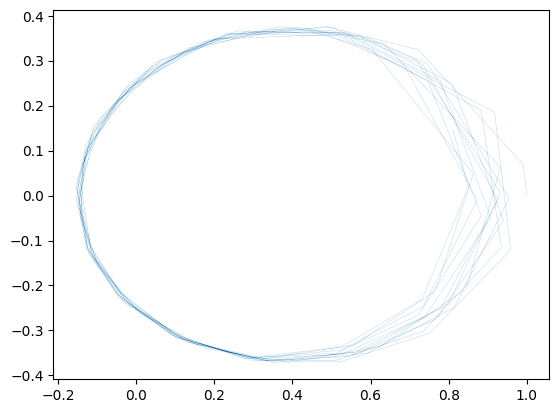

In [239]:
soln_rk=scipy.integrate.solve_ivp(XH_Kepler, [0, 30], [1,0,0,0.5], 'RK45')
plt.plot(soln_rk.y[0], soln_rk.y[1], linewidth=0.1)
plt.show()

In [235]:
DT = 0.001
soln=solve_verlet(XH_Kepler, [0,400], [1.,0,0,0.5], DT)

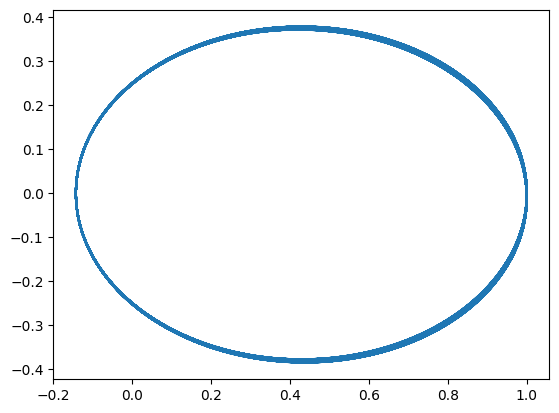

In [236]:
plt.plot(soln[0], soln[1])
plt.show()